In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf

In [2]:
df=pd.read_csv('../input/usedcarscatalog/cars.csv')

In [3]:
df.head()

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
0,Subaru,Outback,automatic,silver,190000,2010,gasoline,False,gasoline,2.5,...,True,True,True,False,True,False,True,True,True,16
1,Subaru,Outback,automatic,blue,290000,2002,gasoline,False,gasoline,3.0,...,True,False,False,True,True,False,False,False,True,83
2,Subaru,Forester,automatic,red,402000,2001,gasoline,False,gasoline,2.5,...,True,False,False,False,False,False,False,True,True,151
3,Subaru,Impreza,mechanical,blue,10000,1999,gasoline,False,gasoline,3.0,...,False,False,False,False,False,False,False,False,False,86
4,Subaru,Legacy,automatic,black,280000,2001,gasoline,False,gasoline,2.5,...,True,False,True,True,False,False,False,False,True,7


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38531 entries, 0 to 38530
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   manufacturer_name  38531 non-null  object 
 1   model_name         38531 non-null  object 
 2   transmission       38531 non-null  object 
 3   color              38531 non-null  object 
 4   odometer_value     38531 non-null  int64  
 5   year_produced      38531 non-null  int64  
 6   engine_fuel        38531 non-null  object 
 7   engine_has_gas     38531 non-null  bool   
 8   engine_type        38531 non-null  object 
 9   engine_capacity    38521 non-null  float64
 10  body_type          38531 non-null  object 
 11  has_warranty       38531 non-null  bool   
 12  state              38531 non-null  object 
 13  drivetrain         38531 non-null  object 
 14  price_usd          38531 non-null  float64
 15  is_exchangeable    38531 non-null  bool   
 16  location_region    385

In [5]:
#getting missing value
print('Total Missing Values',df.isna().sum())

Total Missing Values manufacturer_name     0
model_name            0
transmission          0
color                 0
odometer_value        0
year_produced         0
engine_fuel           0
engine_has_gas        0
engine_type           0
engine_capacity      10
body_type             0
has_warranty          0
state                 0
drivetrain            0
price_usd             0
is_exchangeable       0
location_region       0
number_of_photos      0
up_counter            0
feature_0             0
feature_1             0
feature_2             0
feature_3             0
feature_4             0
feature_5             0
feature_6             0
feature_7             0
feature_8             0
feature_9             0
duration_listed       0
dtype: int64


#Filling Missing Value


In [6]:
#getting column informatio with missing values
print('Column with missing values',df.columns[df.isna().sum()>0].values)

Column with missing values ['engine_capacity']


In [7]:
#getting datatype for mssing values
df['engine_capacity'].dtype

dtype('float64')

In [8]:
#filling mssing value with mean values
df['engine_capacity']=df['engine_capacity'].fillna(df['engine_capacity'].mean())


In [9]:
print('Total missing value',df.isna().sum())

Total missing value manufacturer_name    0
model_name           0
transmission         0
color                0
odometer_value       0
year_produced        0
engine_fuel          0
engine_has_gas       0
engine_type          0
engine_capacity      0
body_type            0
has_warranty         0
state                0
drivetrain           0
price_usd            0
is_exchangeable      0
location_region      0
number_of_photos     0
up_counter           0
feature_0            0
feature_1            0
feature_2            0
feature_3            0
feature_4            0
feature_5            0
feature_6            0
feature_7            0
feature_8            0
feature_9            0
duration_listed      0
dtype: int64


####Chaning booolean column into integer column

In [10]:
#converting boolean column with 0 an 1
for column in df.columns:
    if df.dtypes[column]=='bool':
        df[column]=df[column].astype(np.int)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38531 entries, 0 to 38530
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   manufacturer_name  38531 non-null  object 
 1   model_name         38531 non-null  object 
 2   transmission       38531 non-null  object 
 3   color              38531 non-null  object 
 4   odometer_value     38531 non-null  int64  
 5   year_produced      38531 non-null  int64  
 6   engine_fuel        38531 non-null  object 
 7   engine_has_gas     38531 non-null  int64  
 8   engine_type        38531 non-null  object 
 9   engine_capacity    38531 non-null  float64
 10  body_type          38531 non-null  object 
 11  has_warranty       38531 non-null  int64  
 12  state              38531 non-null  object 
 13  drivetrain         38531 non-null  object 
 14  price_usd          38531 non-null  float64
 15  is_exchangeable    38531 non-null  int64  
 16  location_region    385

In [12]:
{column: len(df[column].unique()) for column in df.columns if df.dtypes[column]=='object'}

{'manufacturer_name': 55,
 'model_name': 1118,
 'transmission': 2,
 'color': 12,
 'engine_fuel': 6,
 'engine_type': 3,
 'body_type': 12,
 'state': 3,
 'drivetrain': 3,
 'location_region': 6}

In [13]:
df=df.drop('model_name',axis=1)

In [14]:
df

,manufacturer_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,body_type,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
0,Subaru,automatic,silver,190000,2010,gasoline,0,gasoline,2.5,universal,...,1,1,1,0,1,0,1,1,1,16
1,Subaru,automatic,blue,290000,2002,gasoline,0,gasoline,3.0,universal,...,1,0,0,1,1,0,0,0,1,83
2,Subaru,automatic,red,402000,2001,gasoline,0,gasoline,2.5,suv,...,1,0,0,0,0,0,0,1,1,151
3,Subaru,mechanical,blue,10000,1999,gasoline,0,gasoline,3.0,sedan,...,0,0,0,0,0,0,0,0,0,86
4,Subaru,automatic,black,280000,2001,gasoline,0,gasoline,2.5,universal,...,1,0,1,1,0,0,0,0,1,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38526,Chrysler,automatic,silver,290000,2000,gasoline,0,gasoline,3.5,sedan,...,1,0,0,1,1,0,0,1,1,301
38527,Chrysler,mechanical,blue,321000,2004,diesel,0,diesel,2.2,hatchback,...,1,0,0,1,1,0,0,1,1,317
38528,Chrysler,automatic,blue,777957,2000,gasoline,0,gasoline,3.5,sedan,...,1,0,0,1,1,0,0,1,1,369
38529,Chrysler,mechanical,black,20000,2001,gasoline,0,gasoline,2.0,minivan,...,1,0,0,0,0,0,0,0,1,490


In [15]:
transmission_mapping={'automatic':0,'mechanical':1}

In [16]:
df['transmission']=df['transmission'].replace(transmission_mapping)

In [17]:
df

,manufacturer_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,body_type,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
0,Subaru,0,silver,190000,2010,gasoline,0,gasoline,2.5,universal,...,1,1,1,0,1,0,1,1,1,16
1,Subaru,0,blue,290000,2002,gasoline,0,gasoline,3.0,universal,...,1,0,0,1,1,0,0,0,1,83
2,Subaru,0,red,402000,2001,gasoline,0,gasoline,2.5,suv,...,1,0,0,0,0,0,0,1,1,151
3,Subaru,1,blue,10000,1999,gasoline,0,gasoline,3.0,sedan,...,0,0,0,0,0,0,0,0,0,86
4,Subaru,0,black,280000,2001,gasoline,0,gasoline,2.5,universal,...,1,0,1,1,0,0,0,0,1,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38526,Chrysler,0,silver,290000,2000,gasoline,0,gasoline,3.5,sedan,...,1,0,0,1,1,0,0,1,1,301
38527,Chrysler,1,blue,321000,2004,diesel,0,diesel,2.2,hatchback,...,1,0,0,1,1,0,0,1,1,317
38528,Chrysler,0,blue,777957,2000,gasoline,0,gasoline,3.5,sedan,...,1,0,0,1,1,0,0,1,1,369
38529,Chrysler,1,black,20000,2001,gasoline,0,gasoline,2.0,minivan,...,1,0,0,0,0,0,0,0,1,490


In [18]:
def onehot_encode(df,columns,prefixes):
    df=df.copy()
    for column,prefix in zip(columns,prefixes):
        dummies=pd.get_dummies(df[column],prefix=prefix)
        df=pd.concat([df,dummies],axis=1)
        df=df.drop(column,axis=1)
    return df

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38531 entries, 0 to 38530
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   manufacturer_name  38531 non-null  object 
 1   transmission       38531 non-null  int64  
 2   color              38531 non-null  object 
 3   odometer_value     38531 non-null  int64  
 4   year_produced      38531 non-null  int64  
 5   engine_fuel        38531 non-null  object 
 6   engine_has_gas     38531 non-null  int64  
 7   engine_type        38531 non-null  object 
 8   engine_capacity    38531 non-null  float64
 9   body_type          38531 non-null  object 
 10  has_warranty       38531 non-null  int64  
 11  state              38531 non-null  object 
 12  drivetrain         38531 non-null  object 
 13  price_usd          38531 non-null  float64
 14  is_exchangeable    38531 non-null  int64  
 15  location_region    38531 non-null  object 
 16  number_of_photos   385

In [20]:
onehot_columns=[
    'manufacturer_name',
    'color',
    'engine_fuel',
    'body_type',
    'state',
    'drivetrain',
    'location_region'
    
]
onehot_prefixes=[
    'm',
    'c',
    'e',
    'b',
    's',
    'd',
    'l'
]

In [21]:
df=onehot_encode(df,columns=onehot_columns,prefixes=onehot_prefixes)

In [22]:
print('Remaining non-numeric column',(df.dtypes=='object').sum())

Remaining non-numeric column 1


In [23]:
df['engine_type'].unique()

array(['gasoline', 'diesel', 'electric'], dtype=object)

In [24]:
label_mapping={
    'gasoline':0,
    'diesel':1,
    'electric':2
}

In [25]:
df['engine_type']=df['engine_type'].replace(label_mapping)

In [26]:
df

,transmission,odometer_value,year_produced,engine_has_gas,engine_type,engine_capacity,has_warranty,price_usd,is_exchangeable,number_of_photos,...,s_owned,d_all,d_front,d_rear,l_Брестская обл.,l_Витебская обл.,l_Гомельская обл.,l_Гродненская обл.,l_Минская обл.,l_Могилевская обл.
0,0,190000,2010,0,0,2.5,0,10900.00,0,9,...,1,1,0,0,0,0,0,0,1,0
1,0,290000,2002,0,0,3.0,0,5000.00,1,12,...,1,1,0,0,0,0,0,0,1,0
2,0,402000,2001,0,0,2.5,0,2800.00,1,4,...,1,1,0,0,0,0,0,0,1,0
3,1,10000,1999,0,0,3.0,0,9999.00,1,9,...,1,1,0,0,0,0,0,0,1,0
4,0,280000,2001,0,0,2.5,0,2134.11,1,14,...,1,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38526,0,290000,2000,0,0,3.5,0,2750.00,1,5,...,1,0,1,0,0,0,0,0,1,0
38527,1,321000,2004,0,1,2.2,0,4800.00,1,4,...,1,0,1,0,1,0,0,0,0,0
38528,0,777957,2000,0,0,3.5,0,4300.00,0,3,...,1,0,1,0,0,0,0,0,1,0
38529,1,20000,2001,0,0,2.0,0,4000.00,1,7,...,1,0,1,0,1,0,0,0,0,0


In [27]:
corr=df.loc[:,'transmission':'duration_listed'].corr()

<AxesSubplot:>

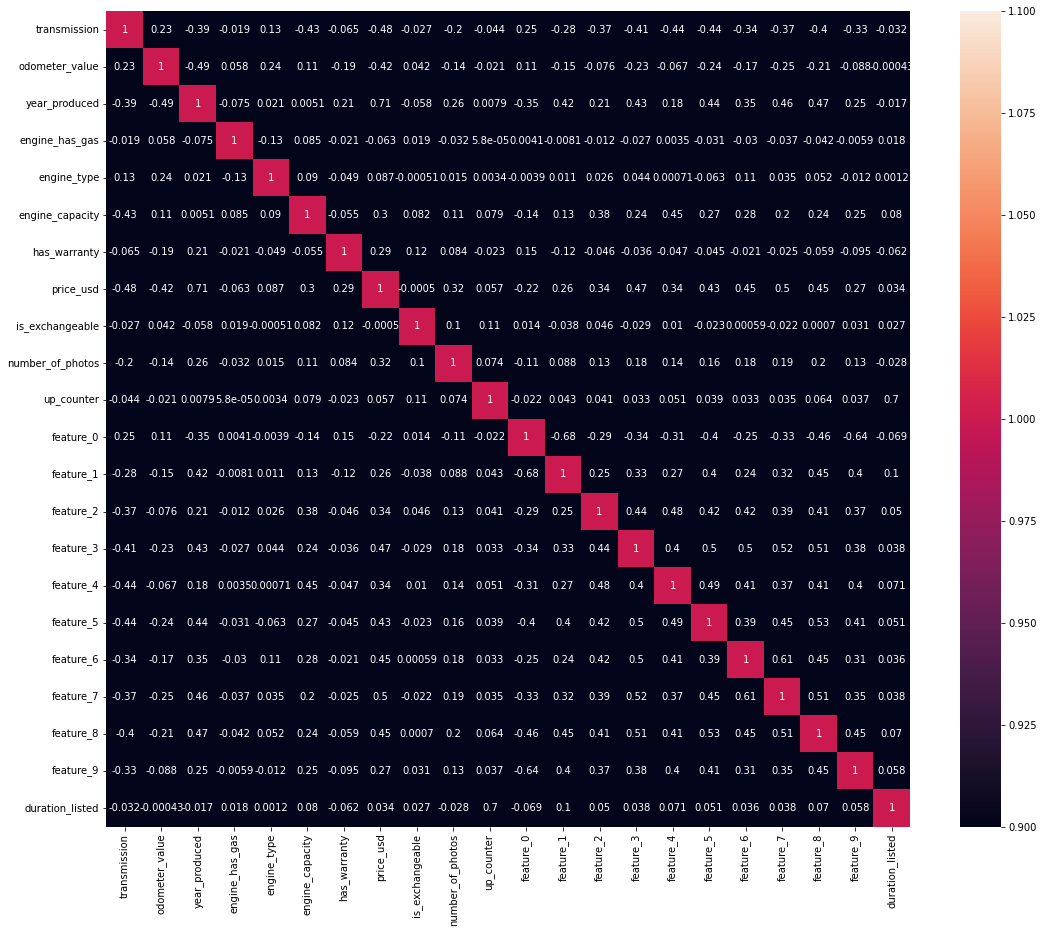

In [28]:
plt.figure(figsize=(18,15))
sns.heatmap(corr,annot=True,vmin=1.0,cmap='rocket')


Splitting/Scaling

In [29]:
y=df['engine_type'].copy()
x=df.drop('engine_type',axis=1).copy()

In [30]:
scaler=StandardScaler()
x=scaler.fit_transform(x)

In [31]:
x
y

0        0
1        0
2        0
3        0
4        0
        ..
38526    0
38527    1
38528    0
38529    0
38530    0
Name: engine_type, Length: 38531, dtype: int64

In [32]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=100)

In [33]:
x.shape

(38531, 118)

In [34]:
inputs=tf.keras.Input(shape=(118,))
x=tf.keras.layers.Dense(64,activation='relu')(inputs)
x=tf.keras.layers.Dense(64,activation='relu')(x)
outputs=tf.keras.layers.Dense(3,activation='softmax')(x)
model=tf.keras.Model(inputs,outputs)
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
history=model.fit(
    x_train,
    y_train,
    validation_split=0.2,
    batch_size=32,
    epochs=100,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=3,
            restore_best_weights=True
        )
    ])


User settings:

   KMP_AFFINITY=granularity=fine,verbose,compact,1,0
   KMP_BLOCKTIME=0
   KMP_DUPLICATE_LIB_OK=True
   KMP_INIT_AT_FORK=FALSE
   KMP_SETTINGS=1
   KMP_WARNINGS=0

Effective settings:

   KMP_ABORT_DELAY=0
   KMP_ADAPTIVE_LOCK_PROPS='1,1024'
   KMP_ALIGN_ALLOC=64
   KMP_ALL_THREADPRIVATE=128
   KMP_ATOMIC_MODE=2
   KMP_BLOCKTIME=0
   KMP_CPUINFO_FILE: value is not defined
   KMP_DETERMINISTIC_REDUCTION=false
   KMP_DEVICE_THREAD_LIMIT=2147483647
   KMP_DISP_NUM_BUFFERS=7
   KMP_DUPLICATE_LIB_OK=true
   KMP_ENABLE_TASK_THROTTLING=true
   KMP_FORCE_REDUCTION: value is not defined
   KMP_FOREIGN_THREADS_THREADPRIVATE=true
   KMP_FORKJOIN_BARRIER='2,2'
   KMP_FORKJOIN_BARRIER_PATTERN='hyper,hyper'
   KMP_GTID_MODE=3
   KMP_HANDLE_SIGNALS=false
   KMP_HOT_TEAMS_MAX_LEVEL=1
   KMP_HOT_TEAMS_MODE=0
   KMP_INIT_AT_FORK=true
   KMP_LIBRARY=throughput
   KMP_LOCK_KIND=queuing
   KMP_MALLOC_POOL_INCR=1M
   KMP_NUM_LOCKS_IN_BLOCK=1
   KMP_PLAIN_BARRIER='2,2'
   KMP_PLAIN_BARRIER_P

Epoch 1/100
675/675 [==============================] - 3s 3ms/step - loss: 0.0669 - accuracy: 0.9802 - val_loss: 0.0012 - val_accuracy: 0.9996
Epoch 2/100
675/675 [==============================] - 2s 3ms/step - loss: 4.8944e-04 - accuracy: 0.9999 - val_loss: 7.5078e-04 - val_accuracy: 0.9998
Epoch 3/100
675/675 [==============================] - 2s 3ms/step - loss: 9.4618e-05 - accuracy: 1.0000 - val_loss: 6.1767e-04 - val_accuracy: 0.9998
Epoch 4/100
675/675 [==============================] - 2s 3ms/step - loss: 4.2628e-05 - accuracy: 1.0000 - val_loss: 5.6297e-04 - val_accuracy: 0.9998
Epoch 5/100
675/675 [==============================] - 2s 3ms/step - loss: 2.3569e-05 - accuracy: 1.0000 - val_loss: 5.0473e-04 - val_accuracy: 0.9998
Epoch 6/100
675/675 [==============================] - 2s 3ms/step - loss: 1.4071e-05 - accuracy: 1.0000 - val_loss: 4.7874e-04 - val_accuracy: 0.9998
Epoch 7/100
675/675 [==============================] - 2s 3ms/step - loss: 8.6338e-06 - accuracy: 1.00

In [35]:
model.evaluate(x_test,y_test)

362/362 [==============================] - 1s 2ms/step - loss: 8.2374e-05 - accuracy: 1.0000


[8.237393194576725e-05, 1.0]